# Computing Spectral Centroid of Audio Files

This notebook helps to analyze a set of audio files in order to classify them and help populate the spectral space of a mix distributing the samples to have the same energy across all spectrum.

In [29]:
import os
import matplotlib.pyplot as plt 
import numpy as np
import IPython
import pandas as pd
from essentia import *
from essentia.standard import *
from collections import defaultdict

### Next cell reads files in `path` and loads them to compute the spectral centroid.

In [21]:
path = '../../data/wavs/'

w = Windowing()
spec = Spectrum()
centroid = Centroid(range=22050)

centroidList = {}
for file in os.listdir(path):
    if file.endswith(".wav"):
        audio = MonoLoader(filename= path + file, sampleRate=44100)()
        c = []
        for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
            c.append(centroid(spec(w(frame))))
        centroidList[file] = np.array(c)

### Plotting some sounds to be aware of their spectral centroid.

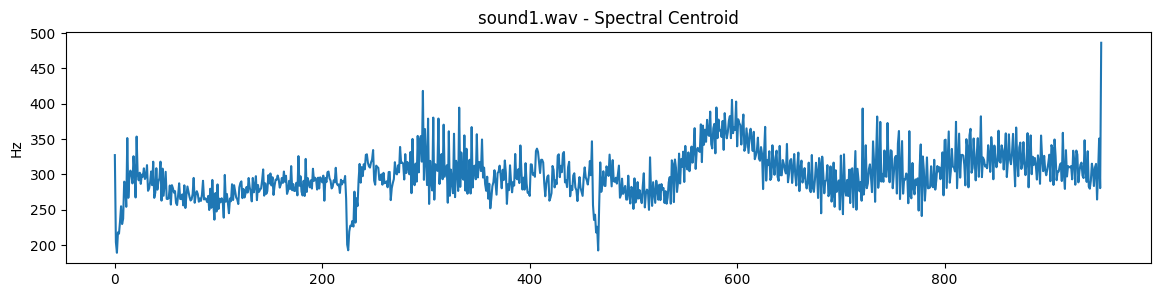

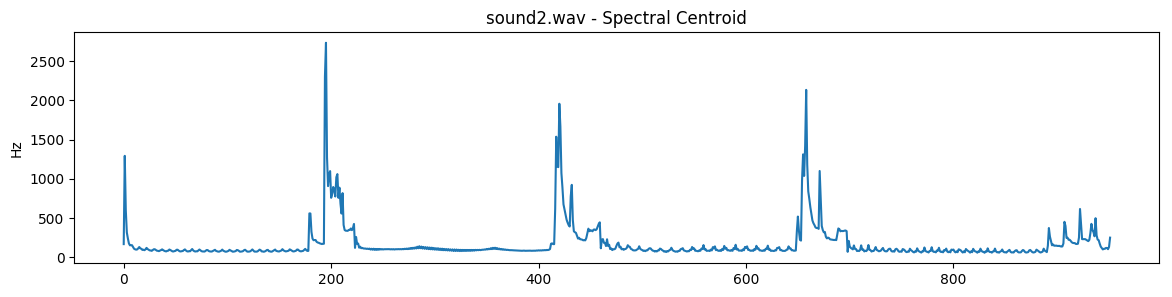

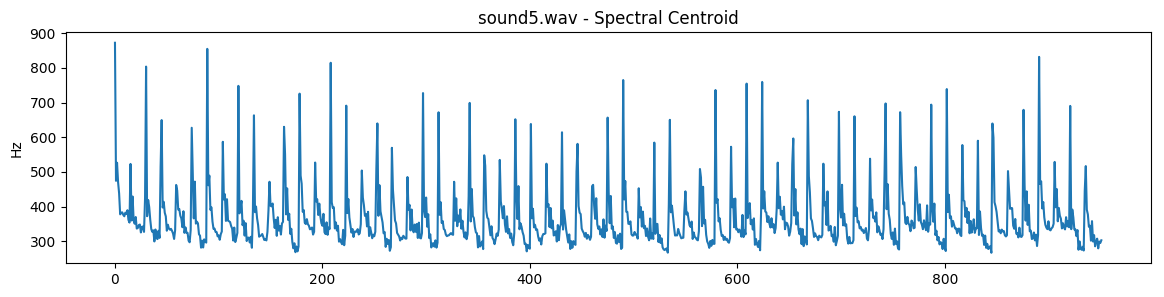

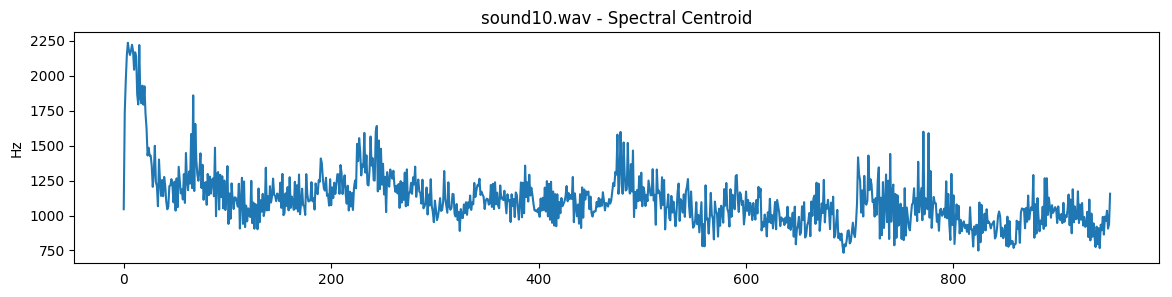

In [26]:
sounds = ['sound1.wav', 'sound2.wav', 'sound5.wav', 'sound10.wav']
for sound in sounds:
    fig= plt.figure(figsize=(14,3))
    plt.plot(centroidList[sound])
    plt.ylabel('Hz')
    plt.title(sound + ' - Spectral Centroid')
    plt.show()
    IPython.display.Audio(path + sound)

### Next cell computes the median of spectral centroid for each file.

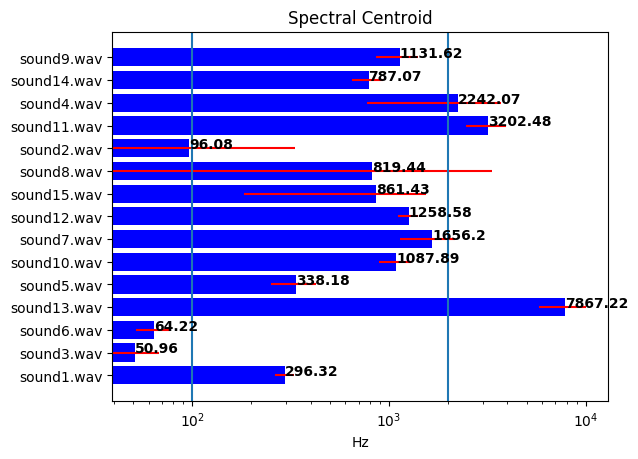

In [39]:
keys = []
means = []
stds = []
band = []
mean = 0
for key, value in centroidList.items(): # For each file
    #print(key + ': std=' + str(np.std(value[5:-5])) + ' mean=' + str(np.median(value[5:-5])))
    keys.append(key)
    stds.append(np.std(value[5:-5]))
    mean = (np.median(value[5:-5]))
    means.append(mean)
    if mean <= 100:
        band.append('low')
    else:
        if mean > 2000:
            band.append('high')
        else:
            band.append('mid')

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(np.arange(len(keys)), means, xerr=stds, align='center',
        color='blue', ecolor='red')
ax.set_xscale('log')
ax.set_yticks(np.arange(len(keys)))
ax.set_yticklabels(keys)
ax.invert_yaxis()
ax.set_xlabel('Hz')
ax.set_title('Spectral Centroid')
plt.axvline(x=100)
plt.axvline(x=2000)
for i, v in enumerate(means):
    ax.text(v, i , str(round(v,2)), color='black', fontweight='bold')
plt.show()


### Next cell assigns band classification based on human judgement

In [37]:
humanClass = ['mid', 'mid', 'mid', 'high', 'low', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid', 'high', 'low', 'low', 'mid']

### Now let's compute a confusio matrix to compare calculated vs human classification

In [49]:
y_actu = pd.Series(humanClass)
y_pred = pd.Series(band)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

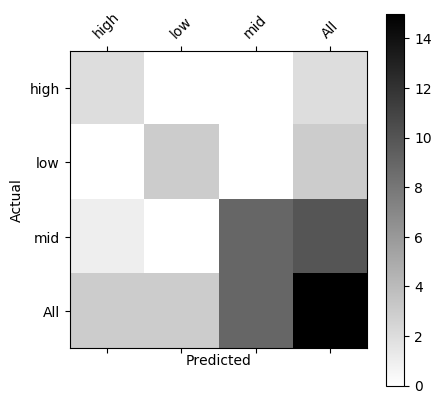

In [54]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)